## 분류 Classification

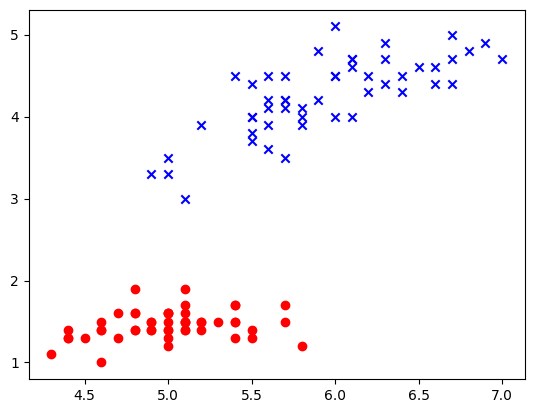

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = datasets.load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1)

plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x')

plt.show()

In [ ]:
#@title Perceptron
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

print(ppn.score(X_test, y_test))
print(f'잘못 분류한 수 : {(y_test != ppn.predict(X_test)).sum()}')

1.0
잘못 분류한 수 : 0


In [ ]:
#@title Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

1.0

In [ ]:
#@title Logisitic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

1.0

In [ ]:
#@title Softmax
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


1.0

In [ ]:
#@title Dicision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

1.0

## 회귀 Regression


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#@title Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)

lr.score(X_train_std, y_train), lr.score(X_test_std, y_test)

(0.5417924056813228, 0.43845439143447806)

In [ ]:
#@title Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test)

(0.6377985631320783, 0.21237413029985652)

In [ ]:
#@title l1 Lasso Regularization
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_poly, y_train)

lasso.score(X_train_poly, y_train), lasso.score(X_test_poly, y_test)

(0.6084088809342945, 0.3759314823953609)

In [ ]:
#@title l2 Ridge Regularization
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=1)
ridge.fit(X_train_poly, y_train)

ridge.score(X_train_poly, y_train), ridge.score(X_test_poly, y_test)

(0.6318584350121768, 0.27312217491904744)

In [ ]:
#@title Dicision Tree Regression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

-0.5634205547591162